In [229]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [230]:
# Load Data to df
df = pd.read_csv('classification_project.csv')

In [231]:
# Check the head of the data
df.head(3)

,age,workclass,fnlwgt,education,education num,marital,occupation,relationship,race,sex,capital gain,capital loss,hours per week,country,income
0,90.0,?,77053.0,HS-grad,9.0,Widowed,?,Not-in-family,White,Female,0.0,4356.0,40.0,United-States,<=50K
1,82.0,Private,132870.0,HS-grad,9.0,Widowed,Exec-managerial,Not-in-family,White,Female,NaN,4356.0,18.0,United-States,<=50K
2,66.0,?,186061.0,Some-college,10.0,Widowed,?,Unmarried,Black,Female,0.0,4356.0,40.0,United-States,<=50K


In [232]:
df = df.replace('?', np.NaN)

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33272 entries, 0 to 33271
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32956 non-null  float64
 1   workclass       30933 non-null  object 
 2   fnlwgt          32941 non-null  float64
 3   education       32919 non-null  object 
 4   education num   32949 non-null  float64
 5   marital         32947 non-null  object 
 6   occupation      30941 non-null  object 
 7   relationship    32966 non-null  object 
 8   race            32942 non-null  object 
 9   sex             32994 non-null  object 
 10  capital gain    32930 non-null  float64
 11  capital loss    32950 non-null  float64
 12  hours per week  32947 non-null  float64
 13  country         32334 non-null  object 
 14  income          33272 non-null  object 
dtypes: float64(6), object(9)
memory usage: 3.8+ MB


In [234]:
df.shape

(33272, 15)

In [383]:
df = df.drop('Armed-Forces', axis=0)

KeyError: ignored

In [235]:
df.describe()

,age,fnlwgt,education num,capital gain,capital loss,hours per week
count,32956.000000,3.294100e+04,32949.000000,32930.000000,32950.000000,32947.000000
mean,39.205729,1.893608e+05,10.063158,1088.362041,88.190774,40.236015
std,14.157151,1.050798e+05,2.593566,7415.013387,407.304617,12.499891
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.177790e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.780740e+05,10.000000,0.000000,0.000000,40.000000
75%,49.000000,2.365860e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [236]:
cat_feat = ['workclass', 'education', 'marital', 'occupation', 'relationship', 'race', 'sex', 'country', 'income']

In [237]:
for cat in cat_feat:
    print(f'[INFO] Feature {cat}')
    print(df[cat].value_counts())
    print('\n')

[INFO] Feature workclass
Private             22767
Self-emp-not-inc     2594
Local-gov            2123
State-gov            1305
Self-emp-inc         1163
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64


[INFO] Feature education
HS-grad         10567
Some-college     7339
Bachelors        5411
Masters          1737
Assoc-voc        1402
11th             1187
Assoc-acdm       1067
10th              955
7th-8th           711
Prof-school       586
9th               541
12th              428
Doctorate         423
5th-6th           341
1st-4th           169
Preschool          55
Name: education, dtype: int64


[INFO] Feature marital
Married-civ-spouse       15242
Never-married            10620
Divorced                  4451
Widowed                   1161
Separated                 1029
Married-spouse-absent      421
Married-AF-spouse           23
Name: marital, dtype: int64


[INFO] Feature occupation
Prof-specialty       4167
Exec

In [238]:
len(df)-len(df.drop_duplicates())

602

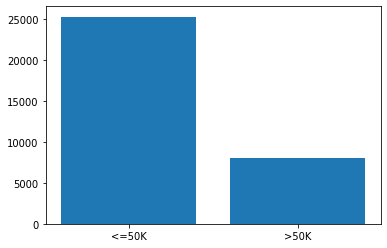

In [239]:
# Bar plot the ratio between target variables
plt.bar(['<=50K', '>50K'], df['income'].value_counts(ascending=False))
plt.show()

In [240]:
len(df[df['capital gain'] > 8000])

874

In [241]:
# check the imbalance ratio between 1 and 0
# this way of printing is called "f printing, the 4f is to display until 4 decimal places

ratio = len(df[df['income'] == '<=50K']) / len(df[df['income'] == '>50K'])
print(f'Ratio between 0 : 1 = 1:{ratio:.4f}') # this way of printing is called "f printing, the 4f is to display until 4 decimal places"


Ratio between 0 : 1 = 1:3.1611


In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33272 entries, 0 to 33271
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32956 non-null  float64
 1   workclass       30933 non-null  object 
 2   fnlwgt          32941 non-null  float64
 3   education       32919 non-null  object 
 4   education num   32949 non-null  float64
 5   marital         32947 non-null  object 
 6   occupation      30941 non-null  object 
 7   relationship    32966 non-null  object 
 8   race            32942 non-null  object 
 9   sex             32994 non-null  object 
 10  capital gain    32930 non-null  float64
 11  capital loss    32950 non-null  float64
 12  hours per week  32947 non-null  float64
 13  country         32334 non-null  object 
 14  income          33272 non-null  object 
dtypes: float64(6), object(9)
memory usage: 3.8+ MB


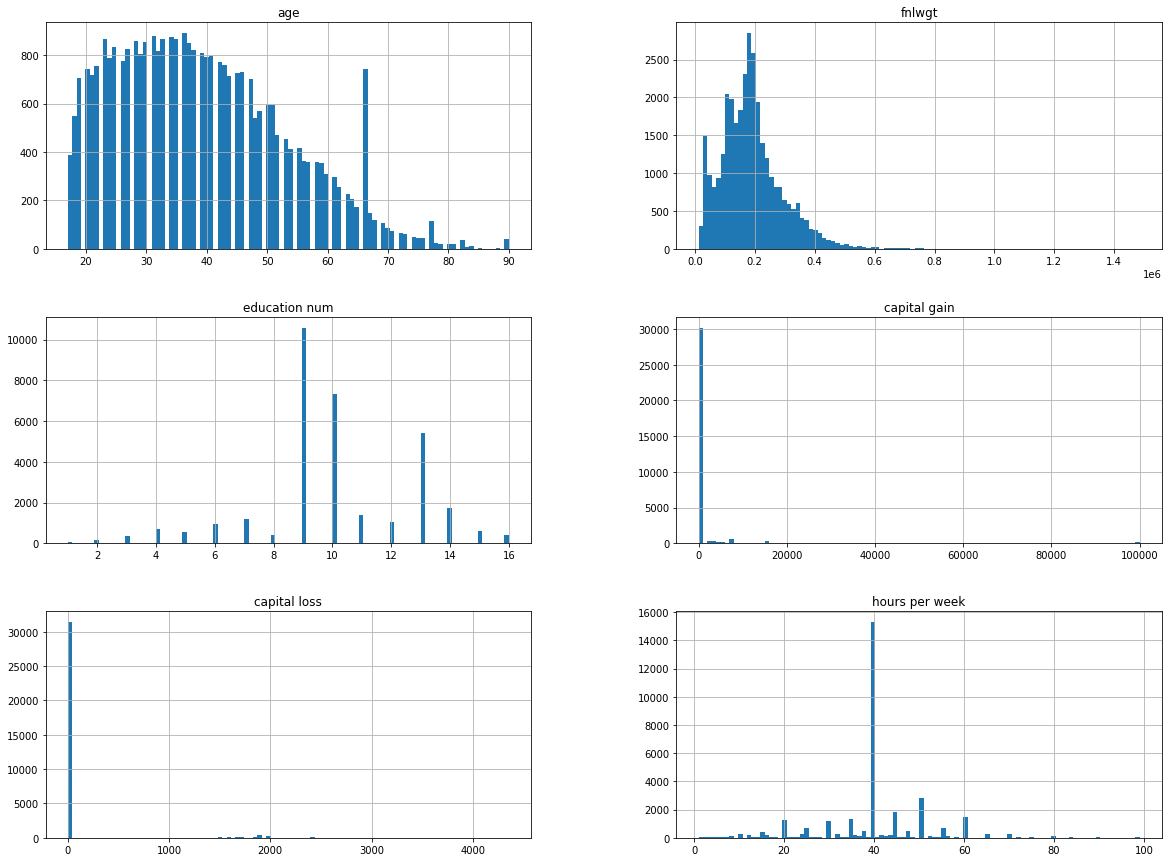

In [243]:
df.hist(bins=100, figsize=(20, 15))
plt.show()

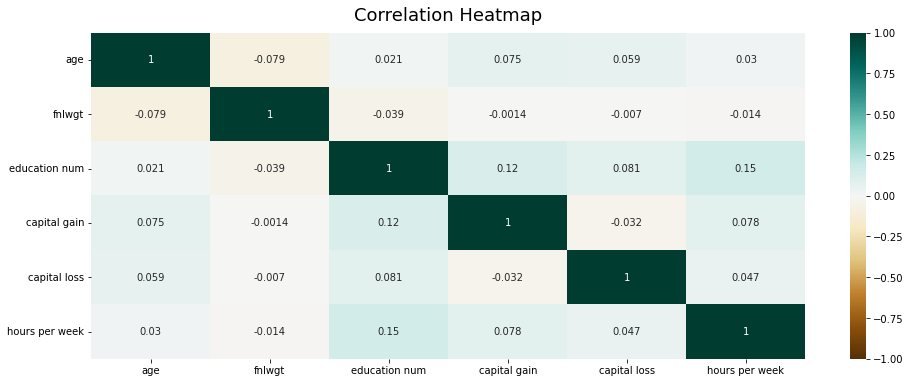

In [244]:
# Create a correlation plot

plt.figure(figsize=(16, 6)) # Create a figure of size (16,6)
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')  # Seaborn depends many of its utility with Matplotlib library. Seaborn is just more pretty
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12) 
plt.savefig('correlation.png', dpi=300, bbox_inches='tight')  # You can save your image to correlation.png, dpi is the resolution


In [245]:
# import train_test_split method from sklearn
from sklearn.model_selection import train_test_split

In [246]:
# set `random_state` for reproduciblity, 
training_set, test_set = train_test_split(df, test_size=0.2, random_state=1, stratify=df[['income']])

In [247]:
TR_LENGTH = len(training_set)
TE_LENGTH = len(test_set)

print(f'Training samples: {TR_LENGTH}, Test samples: {TE_LENGTH}')

Training samples: 26617, Test samples: 6655


In [248]:
# count the number of targets in training_set
training_set['income'].value_counts()

<=50K    20220
>50K      6397
Name: income, dtype: int64

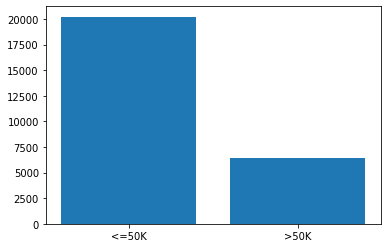

In [249]:
plt.bar(['<=50K', '>50K'], training_set['income'].value_counts())
plt.show()

In [250]:
ratio = len(training_set[training_set['income'] == '<=50K']) / len(training_set[training_set['income'] == '>50K'])
print(f'Ratio of target in training set 0 : 1 = 1:{ratio:.4f}')

Ratio of target in training set 0 : 1 = 1:3.1609


In [251]:
# count the number of targets in test_set
test_set['income'].value_counts()

<=50K    5056
>50K     1599
Name: income, dtype: int64

In [252]:
ratio = len(test_set['income'][test_set['income'] == '<=50K']) / len(test_set['income'][test_set['income'] == '>50K'])
print(f'Ratio of target in training set 0 : 1 = 1:{ratio:.4f}')

Ratio of target in training set 0 : 1 = 1:3.1620


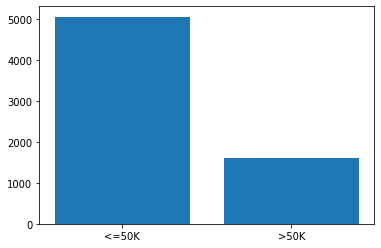

In [253]:
plt.bar(['<=50K', '>50K'], test_set['income'].value_counts())
plt.show()

### Exploratory Data Analysis (EDA)

In [254]:
# copy data for preventing damage in raw training data
data = training_set.copy()

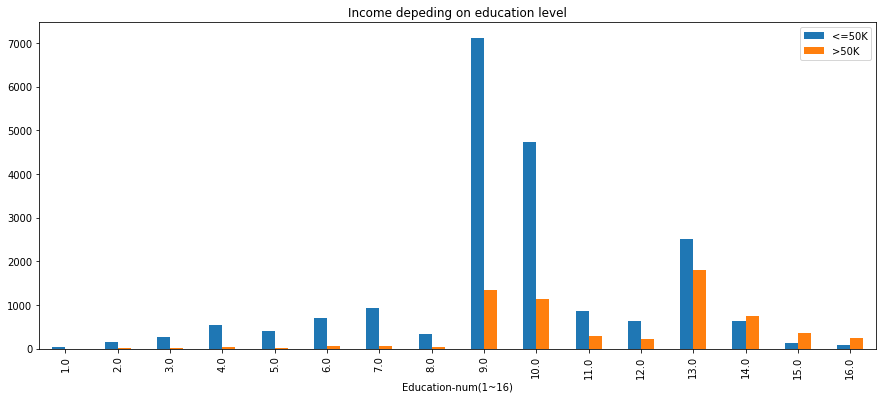

In [255]:
pd.crosstab(training_set['education num'], training_set['income']).plot(kind='bar', figsize=(15, 6))
plt.title('Income depeding on education level')
plt.xlabel('Education-num(1~16)')
plt.legend(['<=50K', '>50K'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


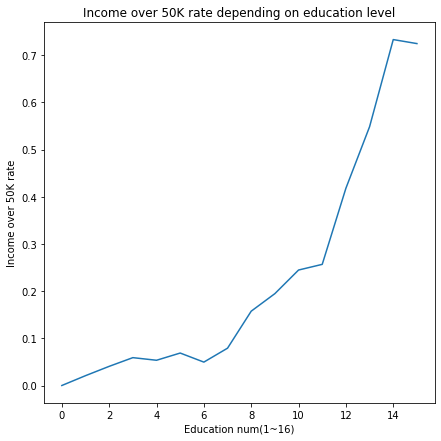

In [256]:
income_ratio = []
for i in range(1, 20):
    if len(training_set[training_set['education num']==i]) > 0:
        income_ratio.append(len(training_set[training_set['income'] == '>50K'][training_set['education num']==i])/len(training_set[training_set['education num']==i]))
    
plt.figure(figsize=(7, 7))
plt.plot(income_ratio)
plt.title('Income over 50K rate depending on education level', y=1)
plt.ylabel('Income over 50K rate')
plt.xlabel('Education num(1~16)')
plt.show()

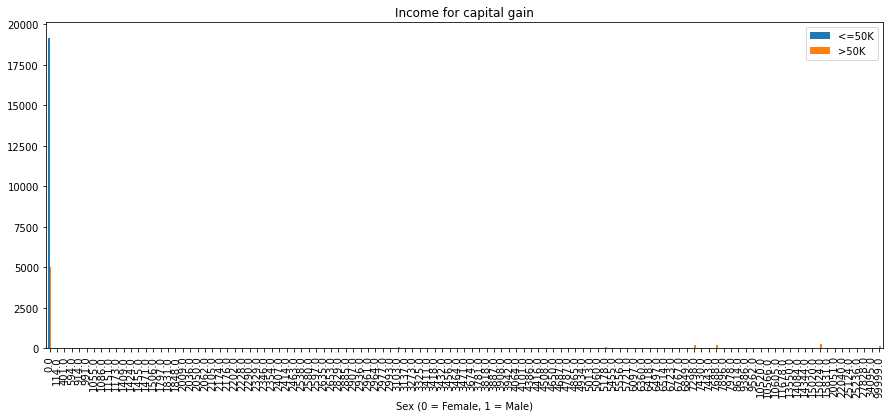

In [257]:
pd.crosstab(training_set['capital gain'], training_set['income']).plot(kind='bar', figsize=(15, 6))
plt.title('Income for capital gain')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.legend(['<=50K', '>50K'])
plt.show()

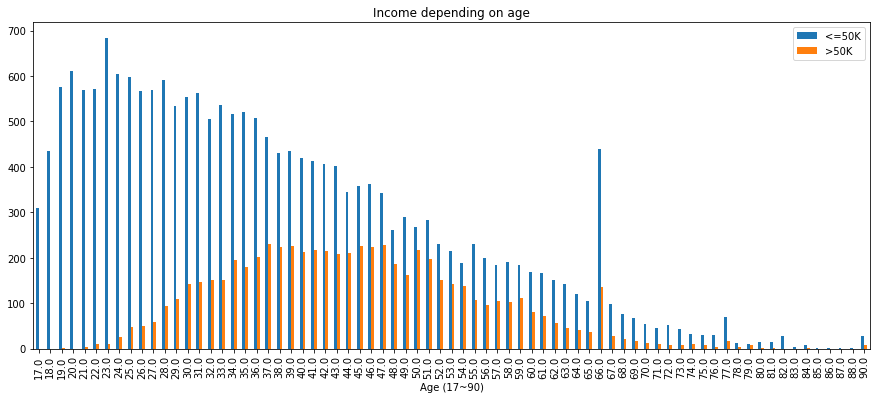

In [258]:
pd.crosstab(training_set['age'], training_set['income']).plot(kind='bar', figsize=(15, 6))
plt.title('Income depending on age')
plt.xlabel('Age (17~90)')
plt.legend(['<=50K', '>50K'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


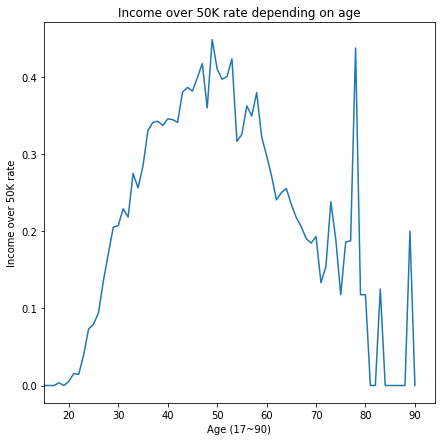

In [259]:
income_ratio = []
for i in range(1, 92):
    if len(training_set[training_set['age']==i]) == 0:
        income_ratio.append(0) 
    if len(training_set[training_set['age']==i]) > 0:
        income_ratio.append(len(training_set[training_set['income'] == '>50K'][training_set['age']==i])/len(training_set[training_set['age']==i]))
    
plt.figure(figsize=(7, 7))
plt.plot(income_ratio)
plt.title('Income over 50K rate depending on age', y=1)
plt.ylabel('Income over 50K rate')
plt.xlabel('Age (17~90)')
plt.xlim(15, 94)
plt.show()

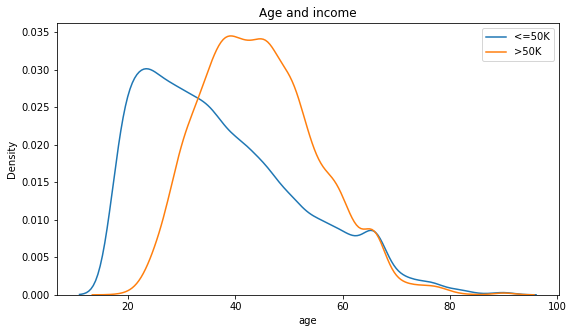

In [260]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
#Kernel Density Estimation of Survived vs Age
sns.kdeplot(training_set[training_set['income'] == '<=50K']['age'], ax=ax)
sns.kdeplot(training_set[training_set['income'] == '>50K']['age'], ax=ax)
plt.legend(['<=50K', '>50K'])
plt.title('Age and income')
plt.show()

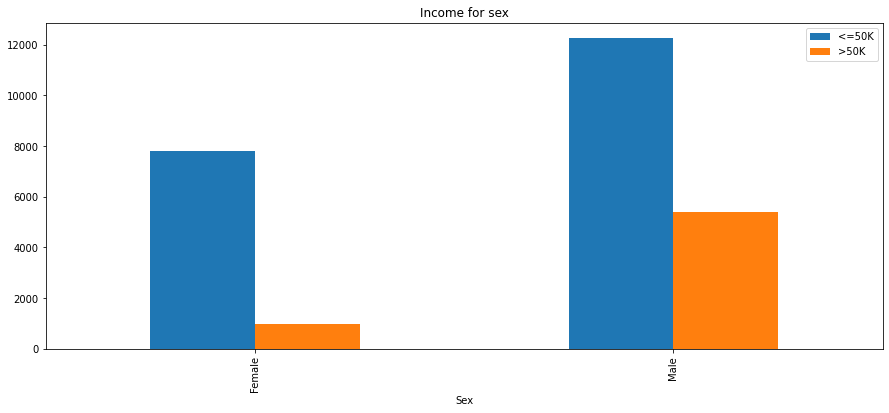

In [261]:
pd.crosstab(training_set['sex'], training_set['income']).plot(kind='bar', figsize=(15, 6))
plt.title('Income for sex')
plt.xlabel('Sex')
plt.legend(['<=50K', '>50K'])
plt.show()

In [262]:
for i in ['Female', 'Male']:
    print('\''+i+'\'')

'Female'
'Male'


In [263]:
female = training_set[training_set['sex'] == 'Female']
female_1 = female[female['income'] == '>50K']
male = training_set[training_set['sex'] == 'Male']
male_1 = male[male['income'] == '>50K']

print(f'income over 50K rate of female = {len(female_1)/len(female)*100:.2f}%')
print(f'income over 50K rate of male = {len(male_1)/len(male)*100:.2f}%')

income over 50K rate of female = 11.00%
income over 50K rate of male = 30.50%


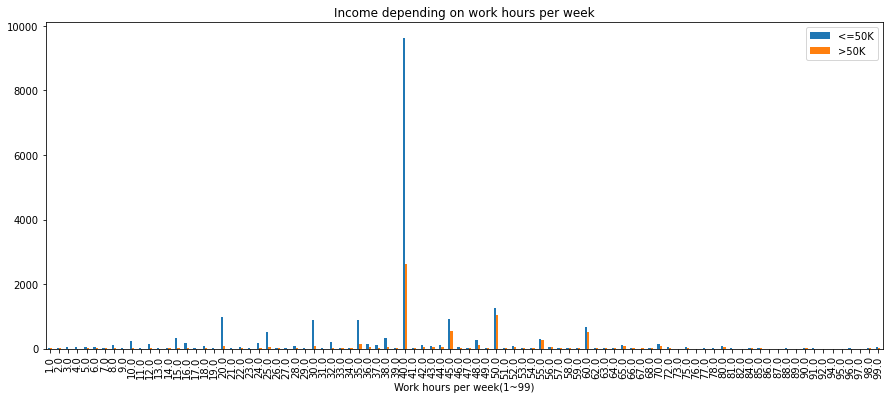

In [264]:
pd.crosstab(training_set['hours per week'], training_set['income']).plot(kind='bar', figsize=(15, 6))
plt.title('Income depending on work hours per week')
plt.xlabel('Work hours per week(1~99)')
plt.legend(['<=50K', '>50K'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


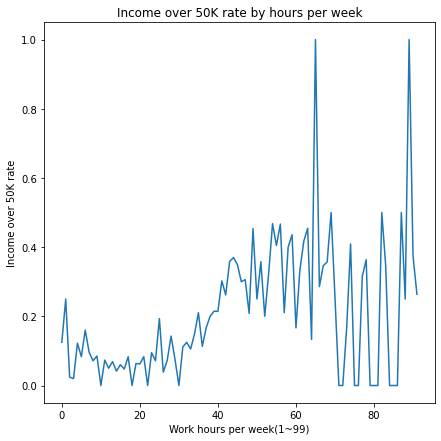

In [265]:
income_ratio = []
for i in range(1, 100):
    if len(training_set[training_set['hours per week']==i]) > 0:
        income_ratio.append(len(training_set[training_set['income'] == '>50K'][training_set['hours per week']==i])/len(training_set[training_set['hours per week']==i]))
    
plt.figure(figsize=(7, 7))
plt.plot(income_ratio)
plt.title('Income over 50K rate by hours per week', y=1)
plt.ylabel('Income over 50K rate')
plt.xlabel('Work hours per week(1~99)')
plt.show()

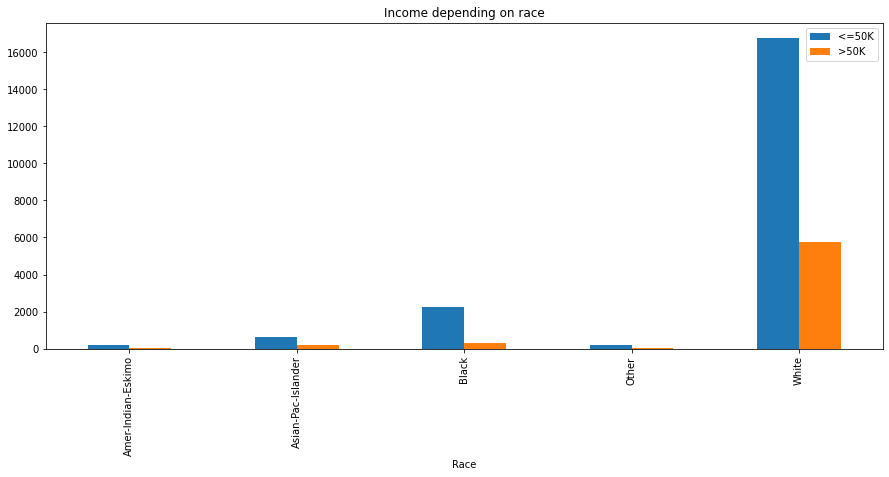

In [266]:
pd.crosstab(training_set['race'], training_set['income']).plot(kind='bar', figsize=(15, 6))
plt.title('Income depending on race')
plt.xlabel('Race')
plt.legend(['<=50K', '>50K'])
plt.show()

In [267]:
White = training_set[training_set['race'] == 'White']
White_1 = White[White['income'] == '>50K']

black = training_set[training_set['race'] == 'Black']
black_1 = black[black['income'] == '>50K']

Asian_Pac_Islander = training_set[training_set['race'] == 'Asian-Pac-Islander']
Asian_Pac_Islander_1 = Asian_Pac_Islander[Asian_Pac_Islander['income'] == '>50K']

Amer_Indian_Eskimo = training_set[training_set['race'] == 'Amer-Indian-Eskimo']
Amer_Indian_Eskimo_1 = Amer_Indian_Eskimo[Amer_Indian_Eskimo['income'] == '>50K']

Other = training_set[training_set['race'] == 'Other']
Other_1 = Other[Other['income'] == '>50K']


print(f'income over 50K rate of White = {len(White_1)/len(White)*100:.2f}%')
print(f'income over 50K rate of Black = {len(black_1)/len(black)*100:.2f}%')
print(f'income over 50K rate of Asian-Pac-Islander = {len(Asian_Pac_Islander_1)/len(Asian_Pac_Islander)*100:.2f}%')
print(f'income over 50K rate of Amer-Indian-Eskimo = {len(Amer_Indian_Eskimo_1)/len(Amer_Indian_Eskimo)*100:.2f}%')
print(f'income over 50K rate of Other = {len(Other_1)/len(Other)*100:.2f}%')

income over 50K rate of White = 25.53%
income over 50K rate of Black = 12.43%
income over 50K rate of Asian-Pac-Islander = 26.26%
income over 50K rate of Amer-Indian-Eskimo = 10.76%
income over 50K rate of Other = 9.05%


### Data Pre-processing
* <a href='#Cleanse-data'>Cleanse data</a>
* <a href='#Scale-data'>Scale data</a>

In [268]:
df.dropna()

,age,workclass,fnlwgt,education,education num,marital,occupation,relationship,race,sex,capital gain,capital loss,hours per week,country,income
3,54.0,Private,140359.0,7th-8th,4.0,Divorced,Machine-op-inspct,Unmarried,White,Female,0.0,3900.0,40.0,United-States,<=50K
4,41.0,Private,264663.0,Some-college,10.0,Separated,Prof-specialty,Own-child,White,Female,0.0,3900.0,40.0,United-States,<=50K
5,34.0,Private,216864.0,HS-grad,9.0,Divorced,Other-service,Unmarried,White,Female,0.0,3770.0,45.0,United-States,<=50K
6,38.0,Private,150601.0,10th,6.0,Separated,Adm-clerical,Unmarried,White,Male,0.0,3770.0,40.0,United-States,<=50K
7,74.0,State-gov,88638.0,Doctorate,16.0,Never-married,Prof-specialty,Other-relative,White,Female,0.0,3683.0,20.0,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33264,77.0,Self-emp-inc,155761.0,Some-college,10.0,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,8.0,United-States,<=50K
33265,77.0,Private,344425.0,9th,5.0,Married-civ-spouse,Priv-house-serv,Wife,Black,Female,0.0,0.0,10.0,United-States,<=50K
33268,77.0,Private,149912.0,Bachelors,13.0,Never-married,Prof-specialty,Not-in-family,White,Female,0.0,0.0,10.0,United-States,<=50K
33269,77.0,Private,83601.0,Prof-school,15.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K


In [269]:
df.dropna().drop_duplicates()

,age,workclass,fnlwgt,education,education num,marital,occupation,relationship,race,sex,capital gain,capital loss,hours per week,country,income
3,54.0,Private,140359.0,7th-8th,4.0,Divorced,Machine-op-inspct,Unmarried,White,Female,0.0,3900.0,40.0,United-States,<=50K
4,41.0,Private,264663.0,Some-college,10.0,Separated,Prof-specialty,Own-child,White,Female,0.0,3900.0,40.0,United-States,<=50K
5,34.0,Private,216864.0,HS-grad,9.0,Divorced,Other-service,Unmarried,White,Female,0.0,3770.0,45.0,United-States,<=50K
6,38.0,Private,150601.0,10th,6.0,Separated,Adm-clerical,Unmarried,White,Male,0.0,3770.0,40.0,United-States,<=50K
7,74.0,State-gov,88638.0,Doctorate,16.0,Never-married,Prof-specialty,Other-relative,White,Female,0.0,3683.0,20.0,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32779,66.0,Private,340734.0,HS-grad,9.0,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
32838,66.0,Private,169435.0,HS-grad,9.0,Widowed,Craft-repair,Not-in-family,White,Male,0.0,0.0,16.0,United-States,<=50K
33197,77.0,Self-emp-inc,192230.0,Some-college,10.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
33210,77.0,Private,149912.0,Bachelors,13.0,Never-married,Prof-specialty,Not-in-family,White,Female,0.0,0.0,10.0,United-States,<=50K


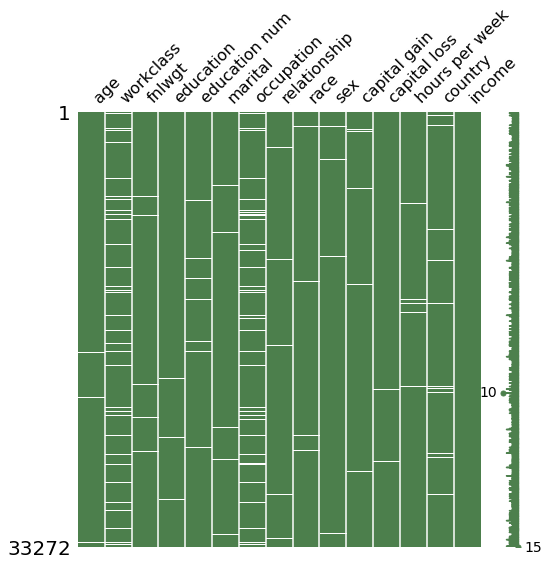

In [270]:
import missingno as msno

msno.matrix(df=df.iloc[:, :], figsize=(8, 8), color=(0.3, 0.5, 0.3))

In [271]:
training_set = training_set.drop(columns=['workclass', 'fnlwgt', 'education', 'marital', 'relationship', 'capital gain', 'capital loss', 'country', 'occupation' ], axis=1)
training_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26617 entries, 29604 to 14985
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             26376 non-null  float64
 1   education num   26360 non-null  float64
 2   race            26361 non-null  object 
 3   sex             26409 non-null  object 
 4   hours per week  26352 non-null  float64
 5   income          26617 non-null  object 
dtypes: float64(3), object(3)
memory usage: 2.4+ MB


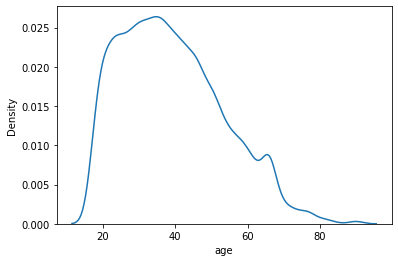

In [272]:
sns.kdeplot(training_set.age)

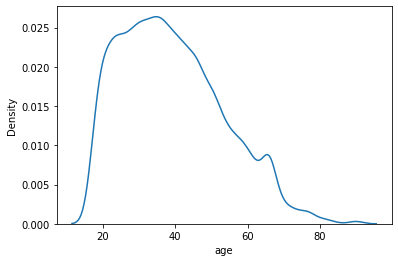

In [273]:
sns.kdeplot(training_set.age)

In [274]:
len(training_set) - len(training_set.drop_duplicates())

14184

In [275]:
len(training_set) - len(training_set.dropna())

1211

In [276]:
training_set = training_set.drop_duplicates()
training_set = training_set.dropna()
training_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11416 entries, 29604 to 16978
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             11416 non-null  float64
 1   education num   11416 non-null  float64
 2   race            11416 non-null  object 
 3   sex             11416 non-null  object 
 4   hours per week  11416 non-null  float64
 5   income          11416 non-null  object 
dtypes: float64(3), object(3)
memory usage: 624.3+ KB


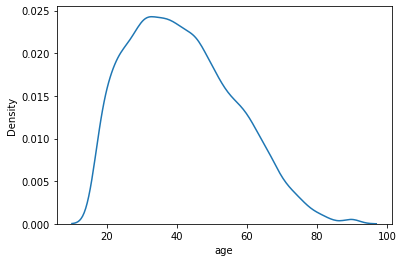

In [277]:
sns.kdeplot(training_set.age)

In [278]:
training_set.loc[df['income'] == '<=50K', 'income'] = 0
training_set.loc[df['income'] == '>50K', 'income'] = 1

training_set.loc[df['sex'] == 'Male', 'income'] = 0
training_set.loc[df['sex'] == 'Female', 'income'] = 1

# Seperate numerical and categorical(nominal & ordinal) columns
nom_feat = ['race']

num_feat = ['age', 'education num', 'hours per week']

X_train= training_set.iloc[:,:-1]
y_train= training_set.iloc[:,-1]
y_train=y_train.astype('int')

In [279]:
X_train.head()

,age,education num,race,sex,hours per week
29604,38.0,9.0,White,Male,48.0
21430,34.0,9.0,Amer-Indian-Eskimo,Male,40.0
25961,17.0,7.0,White,Male,16.0
768,51.0,16.0,White,Male,40.0
22922,49.0,9.0,White,Male,55.0


In [280]:
y_train.head()

29604    0
21430    0
25961    0
768      0
22922    0
Name: income, dtype: int64

##### Encode cateogrical feature
- Convert categorical feature represented in string format into numerical representation.
- Use `OneHotEncoder` for nominal features, and `OrdinalEncoder` for ordinal features.

In [281]:
# import OneHotEncoder and OrdinalEncoder from sklearn.preprocessing
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [282]:
ohe = OneHotEncoder(sparse=False)
oe = OrdinalEncoder()

ohe.fit(X_train[nom_feat].values)
#oe.fit(X_train[ord_feat].values)

X_train_nom = ohe.transform(X_train[nom_feat].values)
#X_train_ord = oe.transform(X_train[ord_feat].values)

In [283]:
# check shape of both X_train_nom and X_train_ord
X_train_nom.shape #X_train_ord.shape

(11416, 5)

In [284]:
# Print X_train_nom and X_train_ord
X_train_nom

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

##### Scale numerical features
- Scale numerical features to have mean 0 and standard deviation 1
- Use `StandardScaler` provided by Scikit-Learn package
- Select numerical feature columns and call `fit_trnasform()` method

In [285]:
# import scaler
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
scalar.fit(X_train[num_feat].values)
X_train_num = scalar.transform(X_train[num_feat].values)

In [286]:
X_train_num.shape

(11416, 3)

In [287]:
# Concatenate back all the data into one single data frame X_train

X_train = np.concatenate([X_train_num, X_train_nom], axis=1)
X_train.shape


(11416, 8)

### Don't forget! You should do the same process above on the test set you made in <a href='#Split-training-and-test-data'>here</a>

In [288]:
test_set = test_set.drop(columns=['workclass','fnlwgt', 'education', 'marital', 'relationship', 'capital gain', 'capital loss', 'country', 'occupation'], axis=1)
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6655 entries, 21459 to 17773
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             6580 non-null   float64
 1   education num   6589 non-null   float64
 2   race            6581 non-null   object 
 3   sex             6585 non-null   object 
 4   hours per week  6595 non-null   float64
 5   income          6655 non-null   object 
dtypes: float64(3), object(3)
memory usage: 363.9+ KB


In [289]:
test_set = test_set.drop_duplicates()
test_set = test_set.dropna()
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4115 entries, 21459 to 17773
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4115 non-null   float64
 1   education num   4115 non-null   float64
 2   race            4115 non-null   object 
 3   sex             4115 non-null   object 
 4   hours per week  4115 non-null   float64
 5   income          4115 non-null   object 
dtypes: float64(3), object(3)
memory usage: 225.0+ KB


In [362]:
test_set.loc[df['income'] == '<=50K', 'income'] = 0
test_set.loc[df['income'] == '>50K', 'income'] = 1

test_set.loc[df['sex'] == 'Male', 'income'] = 0
test_set.loc[df['sex'] == 'Female', 'income'] = 1

# Seperate numerical and categorical(nominal & ordinal) columns
nom_feat = ['race']

num_feat = ['age', 'education num', 'hours per week']


X_test= test_set.iloc[:,:-1]
y_test= test_set.iloc[:,-1]


y_test=y_test.astype('int')

X_test2 = X_test.copy()
y_test2 = y_test.copy()

In [363]:
X_test

,age,education num,race,sex,hours per week
21459,55.0,13.0,White,Male,40.0
24440,47.0,4.0,White,Male,40.0
31230,57.0,3.0,White,Male,40.0
2515,48.0,9.0,White,Male,70.0
17475,28.0,10.0,White,Male,50.0
...,...,...,...,...,...
3586,51.0,15.0,White,Male,40.0
32305,90.0,9.0,White,Female,25.0
2981,38.0,10.0,White,Female,44.0
10201,47.0,4.0,Black,Male,40.0


In [297]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4115 entries, 21459 to 17773
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4115 non-null   float64
 1   education num   4115 non-null   float64
 2   race            4115 non-null   object 
 3   sex             4115 non-null   object 
 4   hours per week  4115 non-null   float64
dtypes: float64(3), object(2)
memory usage: 192.9+ KB


In [298]:
y_test.head()

21459    0
24440    0
31230    0
2515     0
17475    0
Name: income, dtype: int64

In [299]:
ohe = OneHotEncoder(sparse=False)
oe = OrdinalEncoder()

ohe.fit(X_test[nom_feat].values)
#oe.fit(X_test[ord_feat].values)

X_test_nom = ohe.transform(X_test[nom_feat].values)
#X_test_ord = oe.transform(X_test[ord_feat].values)


In [301]:
# check shape of both X_train_nom and X_train_ord
X_test_nom.shape #X_test_ord.shape

(4115, 5)

In [302]:
# Print X_train_nom and X_train_ord
X_test_nom

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [303]:
# import scaler
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
scalar.fit(X_test[num_feat].values)
X_test_num = scalar.transform(X_test[num_feat].values)

In [304]:
X_test_num.shape

(4115, 3)

In [305]:
# Concatenate back all the data into one single data frame X_train

X_test = np.concatenate([X_test_num, X_test_nom], axis=1)
X_test.shape


(4115, 8)

In [306]:
X_train

array([[-0.24081697, -0.34325003,  0.47383329, ...,  0.        ,
         0.        ,  1.        ],
       [-0.50905451, -0.34325003, -0.03086385, ...,  0.        ,
         0.        ,  0.        ],
       [-1.64906405, -1.00166258, -1.54495527, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.02742057,  0.6443688 , -0.03086385, ...,  1.        ,
         0.        ,  0.        ],
       [-0.30787635, -1.33086885,  1.54631472, ...,  0.        ,
         0.        ,  1.        ],
       [-0.64317328,  0.97357508, -2.42817527, ...,  0.        ,
         0.        ,  1.        ]])

In [307]:
y_train

29604    0
21430    0
25961    0
768      0
22922    0
        ..
2922     1
28180    0
6159     1
10305    0
16978    1
Name: income, Length: 11416, dtype: int64

#### Train model
* Choose an appropriate algorithm for your problem setting
* There are tons of ready-made algorithms in here: <a href='https://scikit-learn.org/stable/supervised_learning.html'>Scikit-Learn</a>

In [326]:
# Import LogisticRegression, fit the data
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.svm import SVC

#log_reg = LogisticRegression(C = 7)
#log_reg.fit(X_train, y_train)

DT = DecisionTreeClassifier(max_depth = 8, min_samples_leaf = 18, min_samples_split = 4)
DT.fit(X_train, y_train)

RF = RandomForestClassifier(max_depth = 12, min_samples_leaf = 8, min_samples_split = 20, n_estimators = 100, random_state=0, n_jobs = -1)
RF.fit(X_train, y_train)

KNN = KNeighborsClassifier(n_neighbors=111)
KNN.fit(X_train, y_train)

#model1 = SVC(kernel='linear',random_state = 1, probability = True)
model2 = SVC(kernel='rbf',C=0.1 , gamma = 0.1 ,random_state = 1, probability = True)

#SVC_1 = model1.fit(X_train, y_train)
SVC_2 = model2.fit(X_train, y_train)

In [346]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, auc, roc_curve

In [347]:
y_test

21459    0
24440    0
31230    0
2515     0
17475    0
        ..
3586     0
32305    1
2981     1
10201    0
17773    1
Name: income, Length: 4115, dtype: int64

In [349]:
Y_test = y_test.astype(int)

In [351]:
knn = KNeighborsClassifier(n_neighbors = 111)
knn.fit(X_train, y_train)

y_pred_test = knn.predict(X_test)
y_proba_test = knn.predict_proba(X_test)[:, 1]

acc = accuracy_score(Y_test, y_pred_test)
prc = precision_score(Y_test, y_pred_test)
rec = recall_score(Y_test, y_pred_test)
fs = f1_score(Y_test, y_pred_test)
aucs = roc_auc_score(Y_test, y_proba_test)

knn_eva = [acc,prc,rec,fs,aucs]

print(f'Accuracy: {acc:.4f}, Precision: {prc:.4f}, Recall: {rec:.4f}, F1: {fs:.4f}, AUC: {aucs:.4f}')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


ValueError: ignored

https://jaaamj.tistory.com/35 Grid search

In [309]:
'''from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [10, 100],
           'max_depth' : [2, 3, 6, 8, 10, 12],
           'min_samples_leaf' : [4, 6,  8, 12, 18],
           'min_samples_split' : [4,6,  8, 16, 20]
            }

# RandomForestClassifier 
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))'''

KeyboardInterrupt: ignored

In [ ]:
'''params = { 'max_depth' : [2, 3, 6, 8, 10, 12],
           'min_samples_leaf' : [4, 6,  8, 12, 18],
           'min_samples_split' : [4,6,  8, 16, 20]
            }

# DT
rf_clf = DecisionTreeClassifier(random_state = 0)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))'''

In [ ]:
'''params = {"n_neighbors":[105,107,109,111,113,115,117,119]}

# KNN
rf_clf = KNeighborsClassifier()
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))'''

In [ ]:
'''params = {"C":[1,2,3,4,5,6,7,8,9]}

# Logistic
rf_clf = LogisticRegression()
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))'''

In [ ]:
#print(log_reg.score(X_train, y_train))
print(DT.score(X_train, y_train))
print(RF.score(X_train, y_train))
print(KNN.score(X_train, y_train))
#print(SVC_1.score(X_train, y_train))
print(SVC_2.score(X_train, y_train))

In [ ]:
# Load the Logistic Regression with class_weight set as 'balanced'
#log_reg_cw = LogisticRegression(class_weight='balanced')
#log_reg_cw.fit(X_train, y_train)

In [ ]:
fpr_rf, tpr_rf, threshold = roc_curve(Y_test, y_proba_test)
rocauc_rf = auc(fpr_rf, tpr_rf)

In [ ]:
# Check score
log_reg_cw.score(X_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, precision_recall_fscore_support,\
roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

y_pred_train_log = log_reg.predict(X_train)
y_proba_train_log = log_reg.predict_proba(X_train)[:, 1]

y_pred_train_DT = DT.predict(X_train)
y_proba_train_log_DT = DT.predict_proba(X_train)[:, 1]

y_pred_train_RF = RF.predict(X_train)
y_proba_train_RF = RF.predict_proba(X_train)[:, 1]

y_pred_train_KNN = KNN.predict(X_train)
y_proba_train_KNN = KNN.predict_proba(X_train)[:, 1]

In [ ]:
print(classification_report(y_train, y_pred_train_log))

In [ ]:
print(classification_report(y_train, y_pred_train_DT))

In [ ]:
print(classification_report(y_train, y_pred_train_RF))

In [ ]:
print(classification_report(y_train, y_pred_train_KNN))

##### Internal evaluation
- Can be easily done by `cross_val_score()` method
- When passing argument `cv=10`, it executes 10-fold CV

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(SVC_2, X_train, y_train, scoring='roc_auc', cv=10)
scores

In [ ]:
import sklearn
sklearn.metrics.SCORERS.keys()

In [ ]:
print(f'Scores: {scores},\nMean: {np.mean(scores):.4f},\nStd: {np.std(scores):.4f}')

In [433]:
mean_list = []
accuracy_list = []
std_list = []
name_list=['DT', 'RF', 'KNN', 'SVM_rbf']
model=[DT,RF,KNN, SVC_2]
for i in model:
    model = i
    cv_result = cross_val_score(model,X_train,y_train,cv=10, scoring="accuracy")
    cv_result=cv_result
    mean_list.append(cv_result.mean())
    std_list.append(cv_result.std())
    accuracy_list.append(cv_result)
df_model=pd.DataFrame({'CV Mean':mean_list,'CV Std':std_list},index = ['DT', 'RF', 'KNN', 'SVM_rbf'])
df_model

,CV Mean,CV Std
DT,0.634550,0.012794
RF,0.636478,0.016678
KNN,0.639103,0.014081
SVM_rbf,0.632007,0.008652


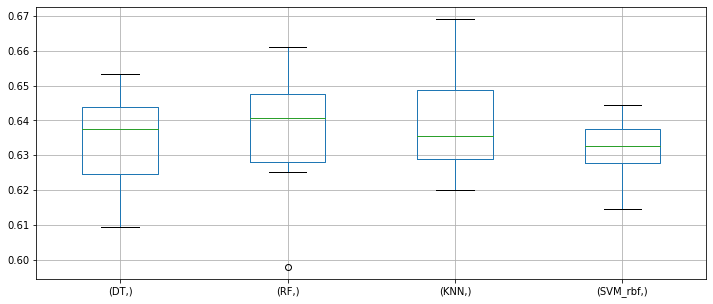

In [434]:
plt.subplots(figsize=(12,5))
box=pd.DataFrame(accuracy_list,index=[name_list])
box.T.boxplot()

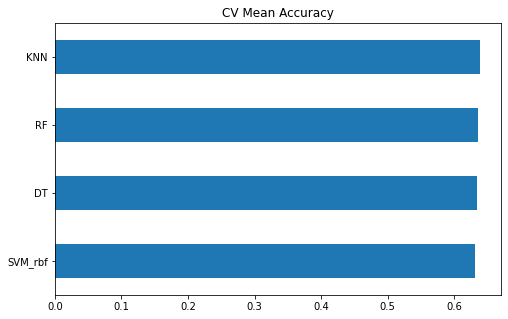

In [435]:
df_model['CV Mean'].sort_values().plot.barh(width=0.5)
plt.title('CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

##### External evaluation
- After processing <a href='#Split-training-and-test-data'>test set</a> you split above in the same way as training set, measure the performance of the trained model on this test set
- Use `predict()` method

In [364]:
test = test_set.copy()
test = test_set.drop_duplicates()
test= test_set.dropna()

In [365]:
nom_feat = ['race']

num_feat = ['age', 'education num', 'hours per week']

In [366]:
#X_test2 = X_test2.drop('occupation', axis=1)

In [367]:
X_test2.loc[df['sex'] == 'Male', 'sex'] = 0
X_test2.loc[df['sex'] == 'Female', 'sex'] = 1
X_test2

,age,education num,race,sex,hours per week
21459,55.0,13.0,White,0,40.0
24440,47.0,4.0,White,0,40.0
31230,57.0,3.0,White,0,40.0
2515,48.0,9.0,White,0,70.0
17475,28.0,10.0,White,0,50.0
...,...,...,...,...,...
3586,51.0,15.0,White,0,40.0
32305,90.0,9.0,White,1,25.0
2981,38.0,10.0,White,1,44.0
10201,47.0,4.0,Black,0,40.0


In [368]:
X_test2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4115 entries, 21459 to 17773
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4115 non-null   float64
 1   education num   4115 non-null   float64
 2   race            4115 non-null   object 
 3   sex             4115 non-null   object 
 4   hours per week  4115 non-null   float64
dtypes: float64(3), object(2)
memory usage: 192.9+ KB


In [369]:
#X_test, y_test = test.drop(columns=['income'], axis=1, inplace=False), test['income'].values

In [370]:
# ohe, oe are the one you've already done fitting with training set!!!
X_test_nom = ohe.transform(X_test2[nom_feat].values)
#X_test_ord = oe.transform(X_test[ord_feat].values)

In [371]:
X_test_nom

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [372]:
# scalar is the one you've already done fitting with training set!!!
X_test2_num = scalar.fit_transform(X_test2[num_feat].values)

In [373]:
X_test2 = np.concatenate([X_test_num, X_test_nom], axis=1)

In [423]:
y_pred_test = DT.predict(X_test2)
y_proba_test = DT.predict_proba(X_test2)[:, 1]

acc = accuracy_score(y_test2, y_pred_test)
prc = precision_score(y_test2, y_pred_test)
rec = recall_score(y_test2, y_pred_test)
fs = f1_score(y_test2, y_pred_test)
aucs = roc_auc_score(y_test2, y_proba_test)

print(f'Accuracy: {acc:.4f}, Precision: {prc:.4f}, Recall: {rec:.4f}, F1: {fs:.4f}, AUC: {aucs:.4f}')

Accuracy: 0.6785, Precision: 0.5487, Recall: 0.3845, F1: 0.4522, AUC: 0.6868


In [424]:
fpr_DT, tpr_DT, threshold = roc_curve(Y_test, y_proba_test)
rocauc_DT = auc(fpr_DT, tpr_DT)

In [425]:
y_pred_test = RF.predict(X_test2)
y_proba_test = RF.predict_proba(X_test2)[:, 1]

acc = accuracy_score(y_test2, y_pred_test)
prc = precision_score(y_test2, y_pred_test)
rec = recall_score(y_test2, y_pred_test)
fs = f1_score(y_test2, y_pred_test)
aucs = roc_auc_score(y_test2, y_proba_test)

print(f'Accuracy: {acc:.4f}, Precision: {prc:.4f}, Recall: {rec:.4f}, F1: {fs:.4f}, AUC: {aucs:.4f}')

Accuracy: 0.6814, Precision: 0.5574, Recall: 0.3725, F1: 0.4466, AUC: 0.7015


In [426]:
fpr_RF, tpr_RF, threshold = roc_curve(Y_test, y_proba_test)
rocauc_RF = auc(fpr_RF, tpr_RF)

In [427]:
y_pred_test = KNN.predict(X_test2)
y_proba_test = KNN.predict_proba(X_test2)[:, 1]

acc = accuracy_score(y_test2, y_pred_test)
prc = precision_score(y_test2, y_pred_test)
rec = recall_score(y_test2, y_pred_test)
fs = f1_score(y_test2, y_pred_test)
aucs = roc_auc_score(y_test2, y_proba_test)

print(f'Accuracy: {acc:.4f}, Precision: {prc:.4f}, Recall: {rec:.4f}, F1: {fs:.4f}, AUC: {aucs:.4f}')

Accuracy: 0.6785, Precision: 0.5541, Recall: 0.3500, F1: 0.4290, AUC: 0.6947


In [428]:
fpr_KNN, tpr_KNN, threshold = roc_curve(Y_test, y_proba_test)
rocauc_KNN = auc(fpr_KNN, tpr_KNN)

In [429]:
y_pred_test = SVC_2.predict(X_test2)
y_proba_test = SVC_2.predict_proba(X_test2)[:, 1]

acc = accuracy_score(y_test2, y_pred_test)
prc = precision_score(y_test2, y_pred_test)
rec = recall_score(y_test2, y_pred_test)
fs = f1_score(y_test2, y_pred_test)
aucs = roc_auc_score(y_test2, y_proba_test)

print(f'Accuracy: {acc:.4f}, Precision: {prc:.4f}, Recall: {rec:.4f}, F1: {fs:.4f}, AUC: {aucs:.4f}')

Accuracy: 0.6705, Precision: 0.5755, Recall: 0.1718, F1: 0.2646, AUC: 0.6866


In [430]:
fpr_SVM, tpr_SVM, threshold = roc_curve(Y_test, y_proba_test)
rocauc_SVM = auc(fpr_SVM, tpr_SVM)

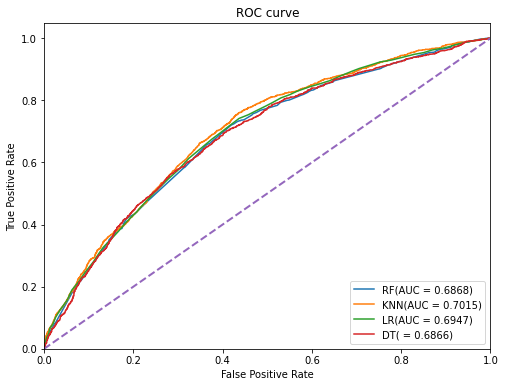

In [438]:
plt.figure(figsize = (8,6))
plt.plot(fpr_knn, tpr_knn, label=f'AUC(KNN): {rocauc_knn*100:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'AUC(RF): {rocauc_rf*100:.2f})')
plt.plot(fpr_dc, tpr_dc, label=f'AUC(DC): {rocauc_dc*100:.2f})')
plt.plot(fpr_lda, tpr_lda, label=f'AUC(LDA): {rocauc_lda*100:.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'AUC(LR): {rocauc_lr*100:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves (about each models)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
y_pred_test

In [ ]:
from sklearn.metrics import auc, roc_curve

fpr, tpr, threshold = roc_curve(y_test2, y_proba_test)
rocauc = auc(fpr, tpr)

In [ ]:
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area={rocauc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
plot_confusion_matrix(log_reg, X_test2, y_test2)
plt.show()